In [1]:
import os
import sys
from pathlib import Path

import torch
import torch.backends.cudnn as cudnn

#..... Tracker modules......
from f80.yolov7.segment.sort_count import *
import numpy as np
import cv2
import random
import pandas as pd
from scipy.interpolate import interp1d
#...........................

%matplotlib inline

c:\Users\Ivan\.conda\envs\yolov7\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
imgs_path = r"D:\1.DATA\1.F80Meter\02.cerroLindo_faja04\Cam_faja08-20240221"
imgs = [os.path.join(imgs_path, file) for file in os.listdir(imgs_path)]

In [26]:
from f80.yolov7.jetson_nano import InstSegmYOLOv7

source = r"roca2_rec.jpg"
model_path = r'C:\Users\Ivan\Documents\Python\ECN-Automation\yolov7-segmentation\pts\best_faja4_v2.pt'
model = InstSegmYOLOv7(model_path)


Fusing layers... 
Fusing layers... 
Model summary: 481 layers, 72373542 parameters, 0 gradients, 229.7 GFLOPs
Model summary: 481 layers, 72373542 parameters, 0 gradients, 229.7 GFLOPs


In [27]:
conf_thres=0.45 # confidence threshold
iou_thres=0.20 # NMS IOU threshold
max_det=200  # maximum detections per image

In [33]:
im_path = random.choice(imgs)
image = cv2.imread(im_path)

obj_dete, image_rslt, cum_rslt = model.predict(image, 
                conf_thres, 
                iou_thres, 
                max_det)


esta madre si funciono
esta madre si funciono
43


In [34]:
cum_rslt = cum_rslt.sort_values("eje_m")

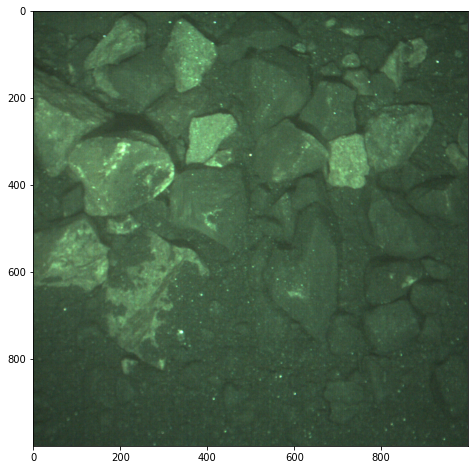

In [35]:
fig, axs = plt.subplots(figsize=(8,8))
axs.imshow(image)
plt.show()

In [36]:
cum_rslt

,eje_M,eje_m,ell_vol,cum_vol
34,45.374693,8.782198,1832.393658,0.032785
30,20.979700,14.637000,2353.434099,0.074891
31,23.419200,15.612800,2989.043742,0.128371
28,32.884461,19.028100,6234.192338,0.239911
24,35.128800,20.979700,8095.813300,0.384758
27,31.225600,20.979700,7196.278489,0.513512
20,36.063564,21.169562,8462.350594,0.664918
39,29.274000,21.955500,7388.688450,0.797114
38,31.713500,22.443400,8364.116950,0.946762
32,36.104593,23.907096,10804.750224,1.140077


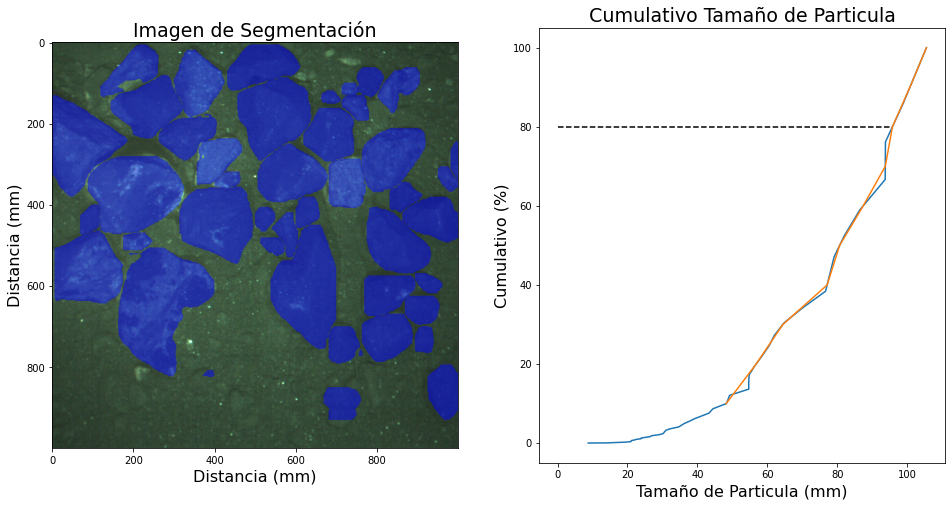

In [37]:
psd = interp1d(cum_rslt["cum_vol"].tolist(), cum_rslt["eje_m"].tolist() 
                )
cum = np.linspace(10, 100, 10)
Fs = psd([10,20,30,40,50,60,70,80,90])

Fs = np.append(Fs, max(cum_rslt["eje_m"]))

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].set_title("Imagen de Segmentación", size=19)
axs[0].set_xlabel("Distancia (mm)", size=16)
axs[0].set_ylabel("Distancia (mm)", size=16)
axs[0].imshow(image_rslt)

axs[1].set_title("Cumulativo Tamaño de Particula", size=19)
axs[1].set_xlabel("Tamaño de Particula (mm)", size=16)
axs[1].set_ylabel("Cumulativo (%)", size=16)

axs[1].plot(cum_rslt["eje_m"], cum_rslt["cum_vol"])
axs[1].plot(Fs, cum)
axs[1].plot([0, Fs[7]], [80, 80], "--", c="black")
plt.show()

esta madre si funciono
esta madre si funciono
43


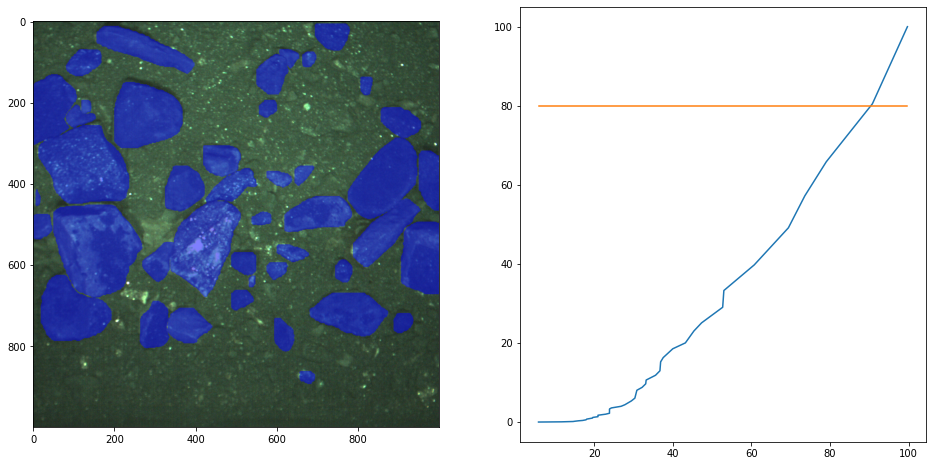

In [ ]:
im_path = random.choice(imgs)
image = cv2.imread(im_path)

obj_dete, image_rslt, cum_rslt = model.predict(image, 
                conf_thres, 
                iou_thres, 
                max_det)

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].imshow(image_rslt)

axs[1].plot(cum_rslt["eje_m"], cum_rslt["cum_vol"])
axs[1].plot([min(cum_rslt["eje_m"]), max(cum_rslt["eje_m"])], [80, 80])
plt.show()

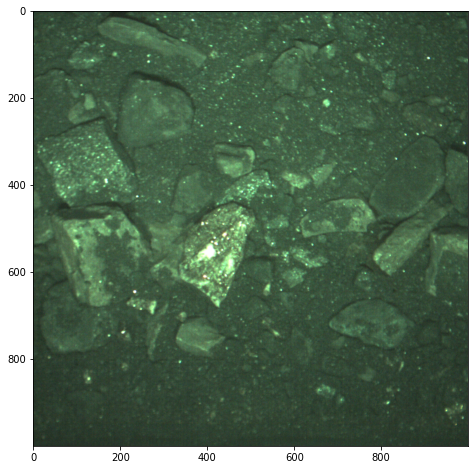

In [ ]:
# im_path = random.choice(imgs)
# image = cv2.imread(im_path)
fig, axs = plt.subplots(figsize=(8,8))
axs.imshow(image)
plt.show()

In [ ]:
images = []
for i in range(9):
    im_path = random.choice(imgs)
    image = cv2.imread(im_path)
    images.append(image)

In [ ]:
im_rslt = []
rslt_ar = []
try:
    for im in images:
        obj_dete, image_rslt, cum_rslt = model.predict(im, 
                                                    conf_thres, 
                                                    iou_thres, 
                                                    max_det)
        im_rslt.append(image_rslt)
        rslt_ar.append(cum_rslt)

except Exception as e:
    print(e)

esta madre si funciono
esta madre si funciono
35
esta madre si funciono
esta madre si funciono
50
esta madre si funciono
esta madre si funciono
53
esta madre si funciono
esta madre si funciono
42
esta madre si funciono
esta madre si funciono
11
esta madre si funciono
esta madre si funciono
11
esta madre si funciono
esta madre si funciono
17
esta madre si funciono
esta madre si funciono
39
esta madre si funciono
esta madre si funciono
90


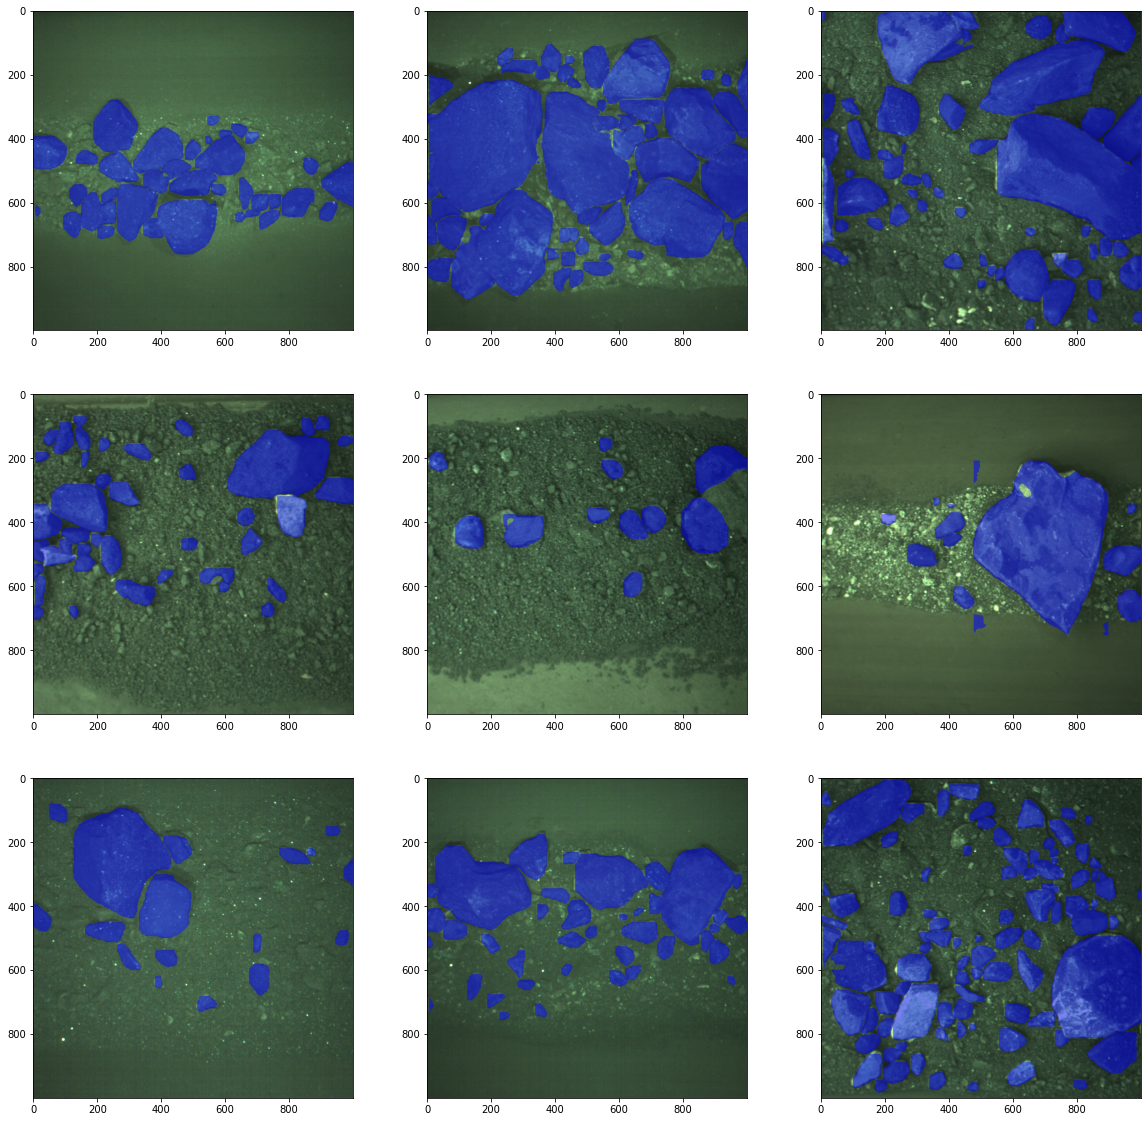

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(20,20))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(im_rslt[i*3 + j])
plt.show()